In [77]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

r = requests.get("https://api.dawum.de/")
data = json.loads(r.text)
#print(data)

In [78]:
def num_of_parties():
    return len(data["Parties"])
    
def party_name_by_id(id):
    parties = data["Parties"]
    return parties[str(id)]["Shortcut"]

def survey_by_id(id):
    surveys = data["Surveys"]
    return surveys[str(id)]

def survey_list():
    out = []
    for s in data["Surveys"]:
        out.append(data["Surveys"][s])
    return out

def parties_in_survey(survey):
    out = []
    for party_id in survey["Results"]:
        out.append(party_id)
    return out

def result_of_party_in_survey(survey, party_id):
    return survey["Results"][str(party_id)]
#print(num_of_parties())
#print(party_name_by_id(5))
#print(survey_by_id(365))
#print(survey_list())

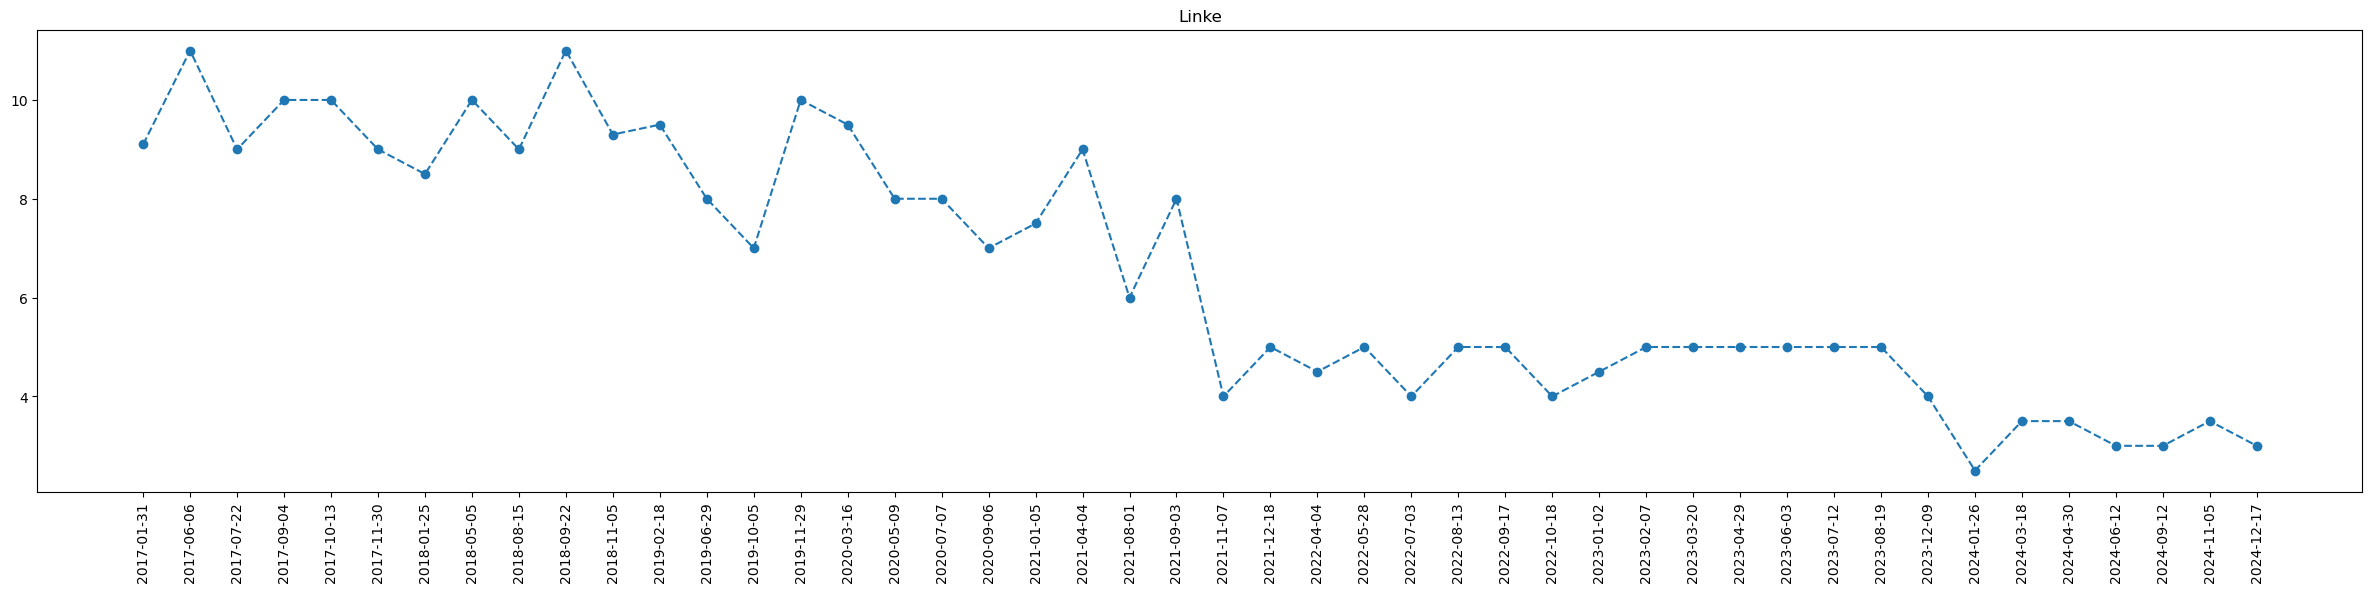

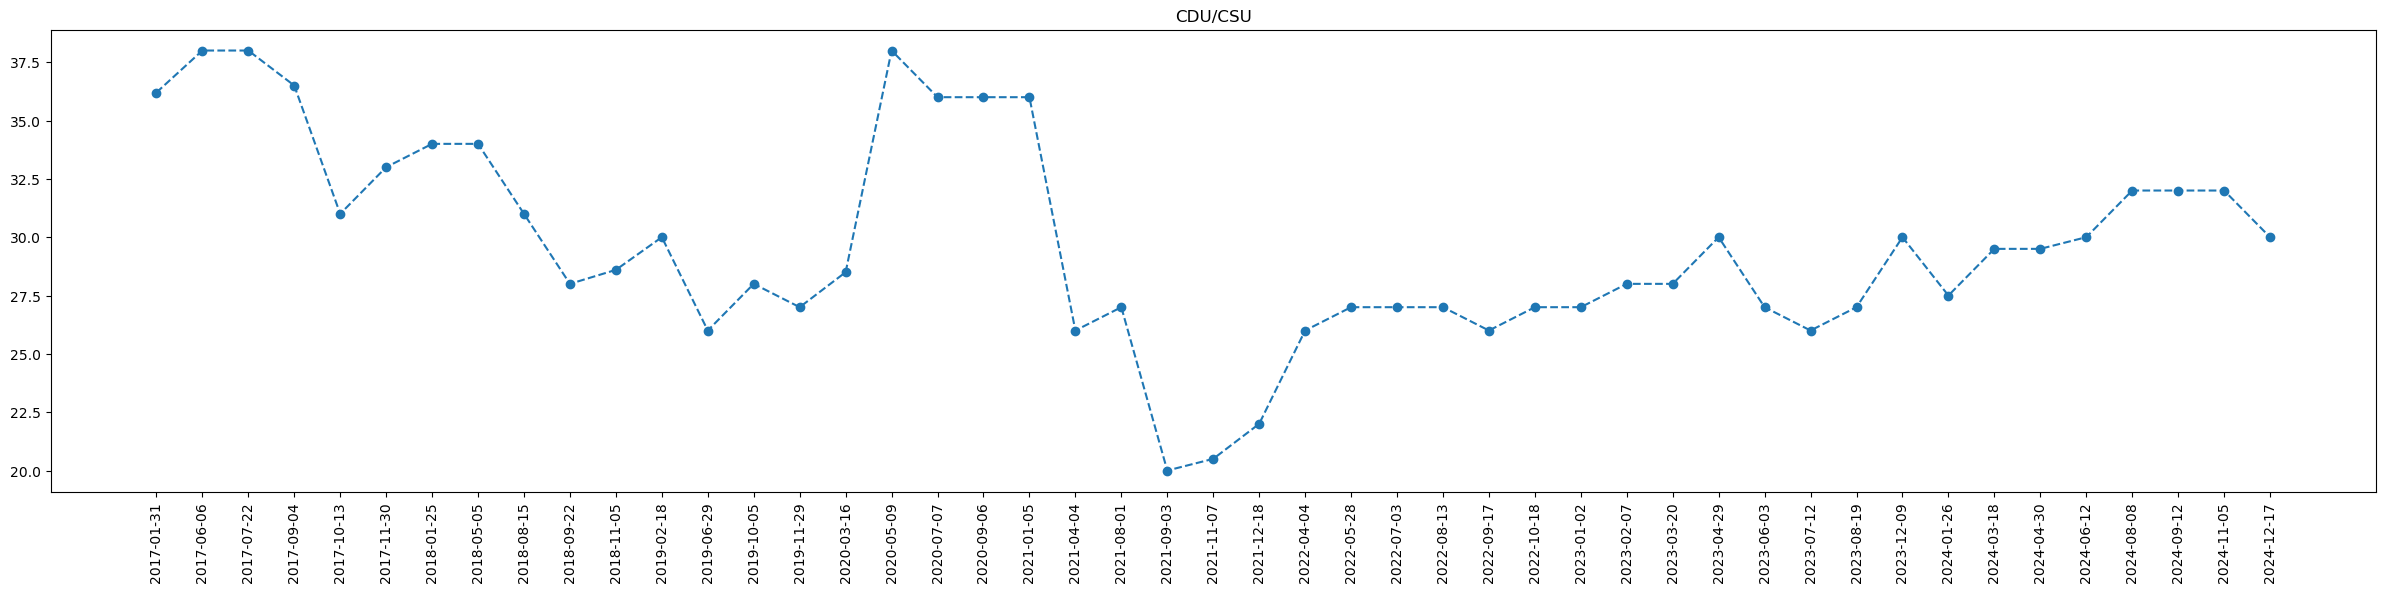

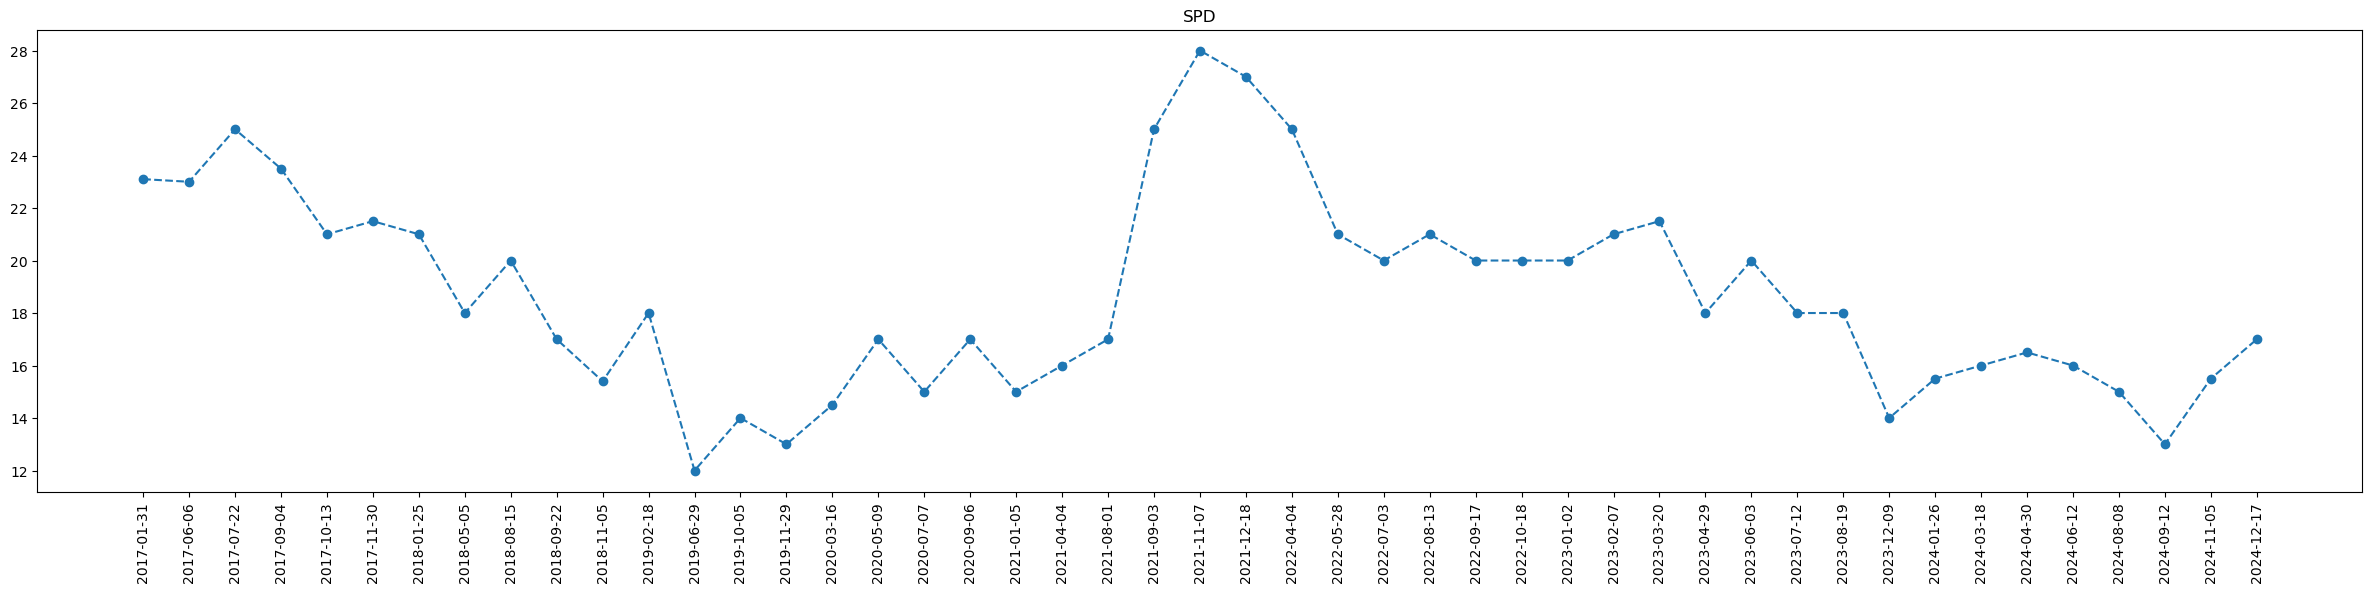

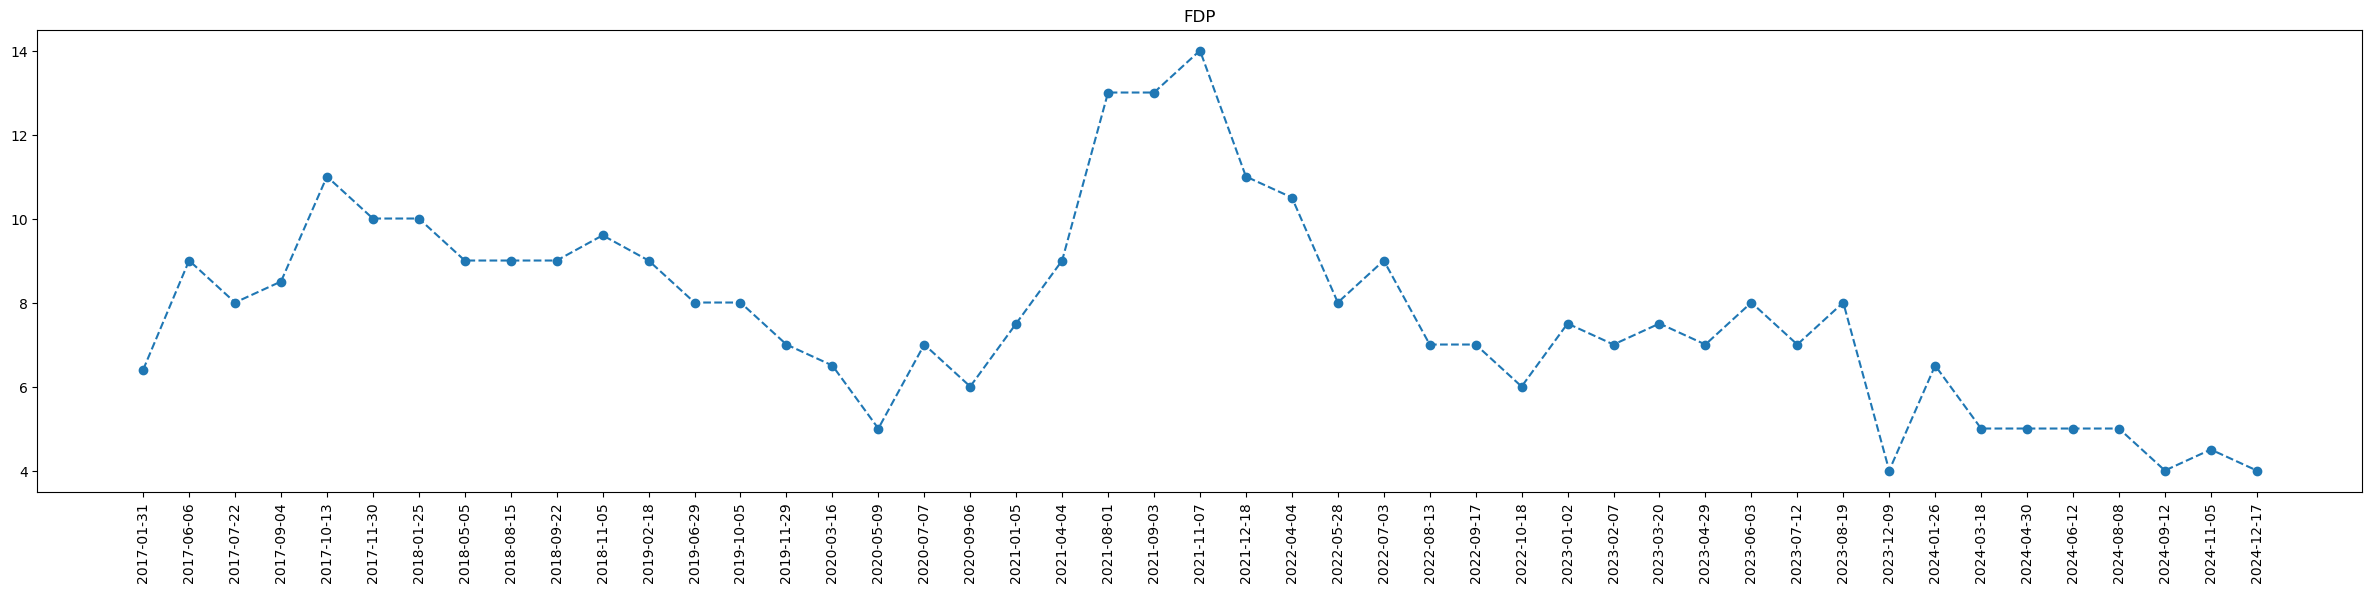

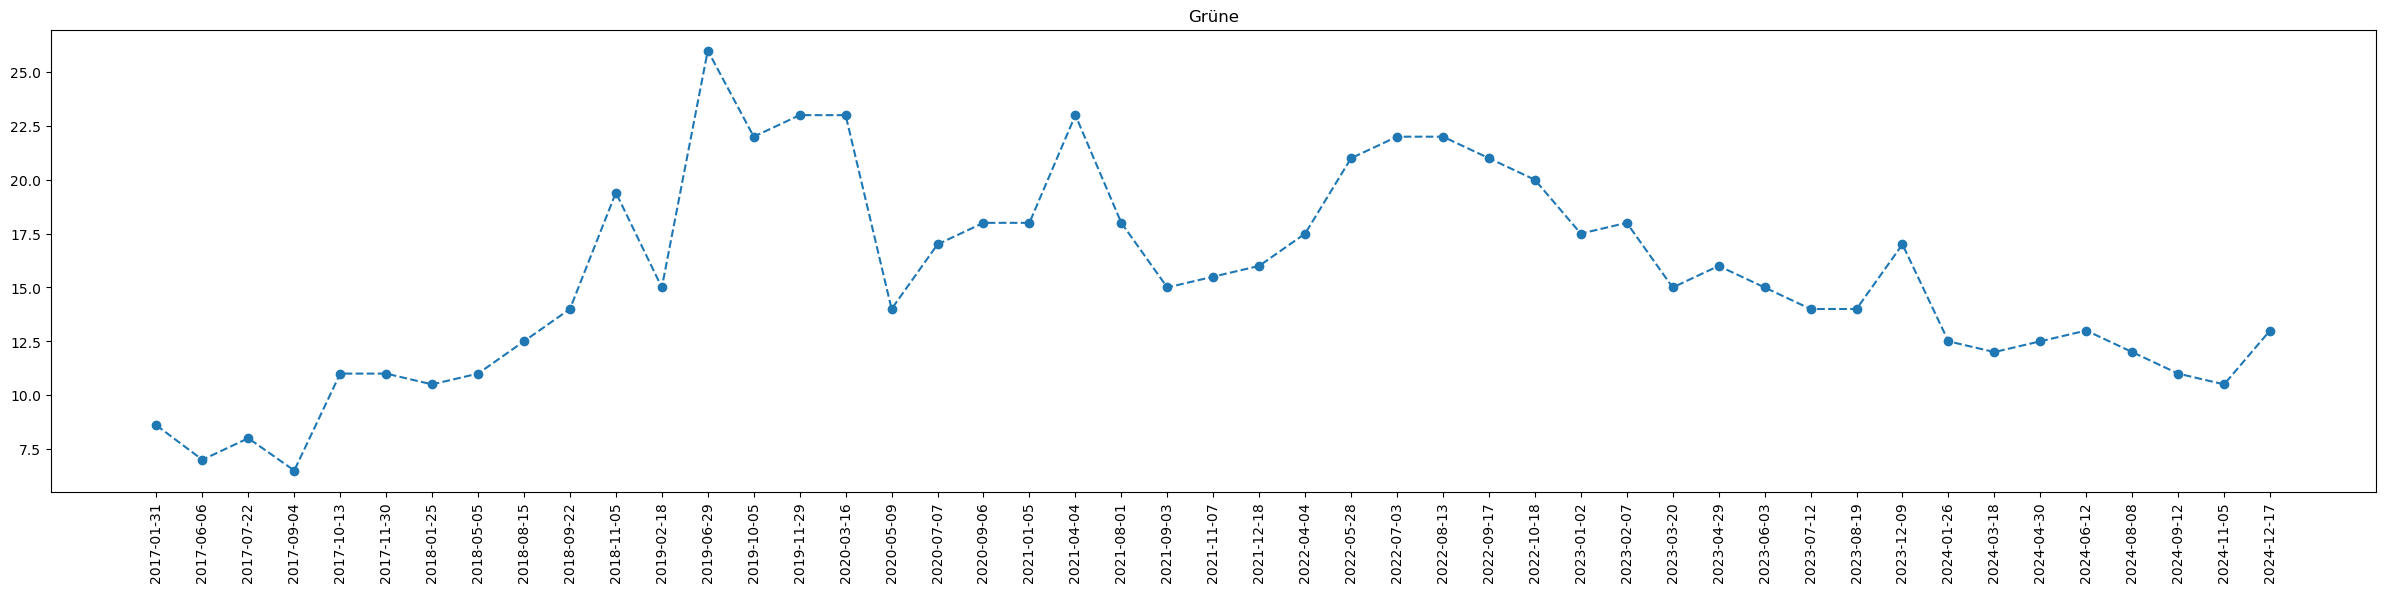

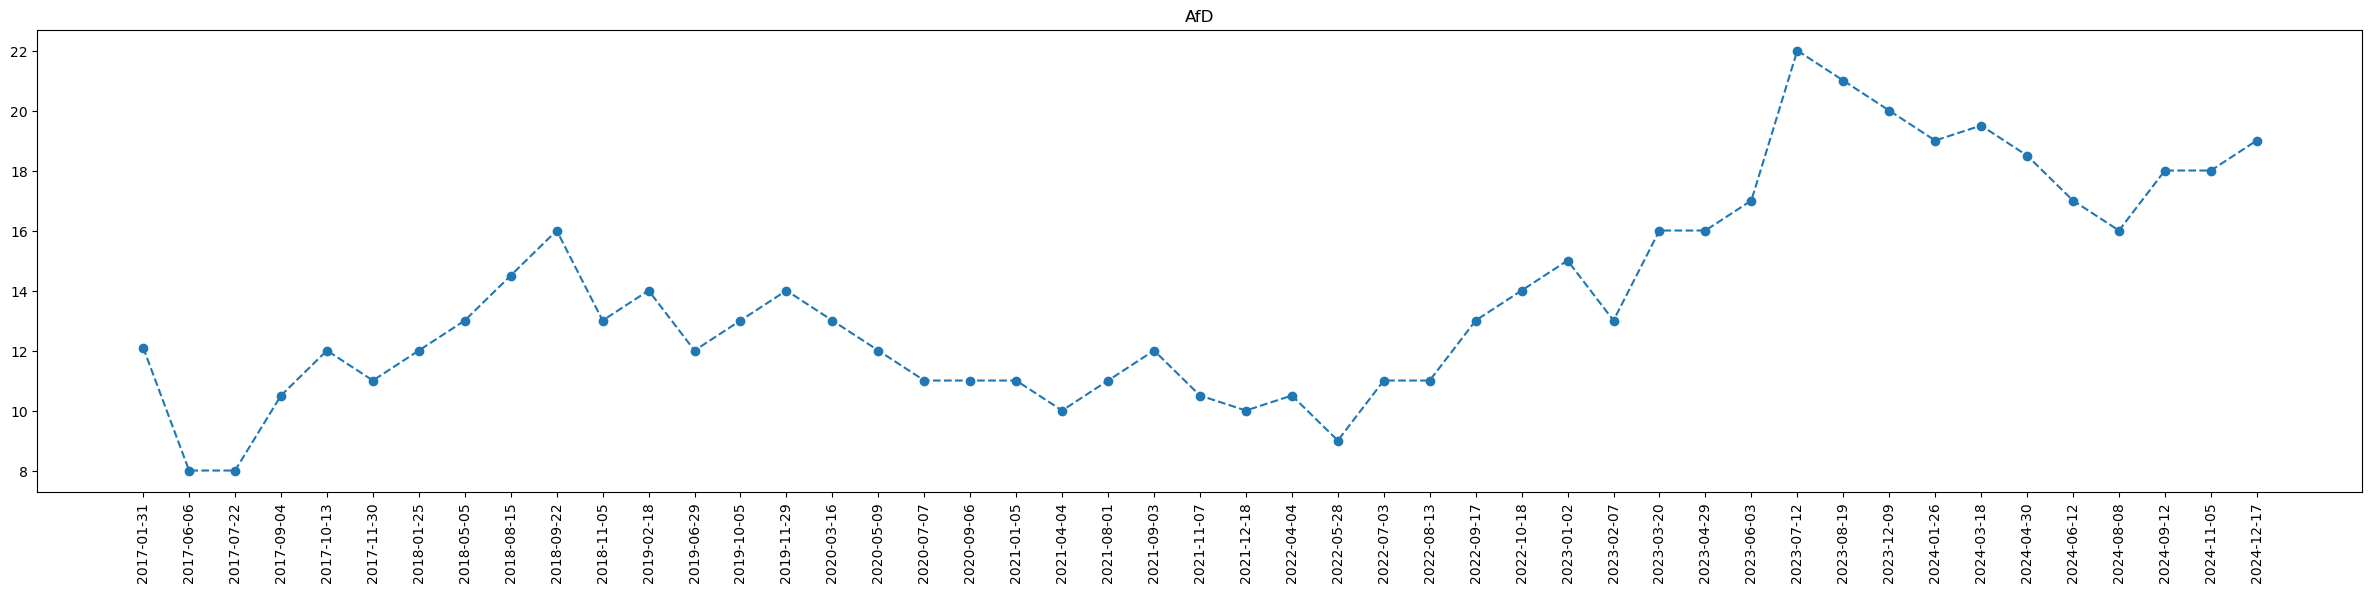

In [95]:

def plot_party(party_id):
    party_name = party_name_by_id(party_id)
    party_data = ([], [])
    
    for i in range(0, len(survey_list()), 50):
        s = survey_list()[i]
        if s["Parliament_ID"] == "0":
            for p in parties_in_survey(s):
                if p == party_id:
                    party_data[0].append(s["Date"])
                    party_data[1].append(result_of_party_in_survey(s, p))
    d = party_data[0]
    r = party_data[1]
    d.reverse()
    r.reverse()
    plt.figure(figsize=(30,6))
    plt.title(party_name)
    plt.plot_date(d, r, linestyle='--')
    plt.xticks(rotation='vertical')
    plt.show()
    

plot_party("5")
plot_party("1")
plot_party("2")
plot_party("3")
plot_party("4")
plot_party("7")